# Explore Simple Neural Networks with PyTorch
Copyright 2021, LEAKY.AI LLC

In this exercise, we will build some very simple neural networks using PyTorch and explore their properties.  You will:

- Use Google Colab to develop simple neural networks using PyTorch
- Learn how to build hidden layers
- Learn how to select the appropiate output activation function
- Understand how to estimate the model size
- Explore weights and bias settings

To get started, head over to Google Colab via this link:

https://colab.research.google.com

Then load the GitHub project using the following URL:

https://github.com/LeakyAI/PyTorch-Overview

Then replace the <b>[TBD]</b> parts below with your code and execute all the cells.  Most cells will have the correct solution below for you to check your results.
 
Don't forget to have your PyTorch Cheatsheet handy which you can find in the downloads below the class video.

Good luck!

## Step 1 - Import the PyTorch Libraries
PyTorch has several libraries we will need to build this project.  The main library is the torch library.  We will also load the torchvision library which contains the pre-trained neural network we will need for our project as well as some transformation libraries that will help us process the image before passing it to our neural network.


In [1]:
# Import PyTorch, NN module and NN.functional as F
# Print out the PyTorch Version
import torch
import torch.nn as nn
import torch.nn.functional as F

print (f"PyTorch Version: {torch.__version__}")

PyTorch Version: 1.9.0


#### Expected Result:
<pre>PyTorch Version: 1.9.0</pre>

In [2]:
# PyTorch uses random values in many parts of the code
# Setting this value will help us have repeatable results when re-executing cells
torch.manual_seed(6)

## Step 2 - Build a Simple Model
One way to build a simple model in PyTorch is to extend the nn.Module class.  In that case, you will need to define both the __init__ and forward function.  An example is below:

<pre>
class MyExampleNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(5,100)
        self.fc2 = nn.Linear(100,10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        yHat = F.relu(self.fc2(x))
        return yHat    
</pre>

Lets build a network that has the following properties:

- 2 inputs (no activation function)
- 1 output (no activation function)

Skeleton code has been given to you below to get started.

In [3]:
# Build a transformation for each image passed into our network
class MySimpleNetwork(nn.Module):
    
        # Network takes 2 inputs, produces 1 output
        def __init__(self):
            super(MySimpleNetwork,self).__init__()
            self.fc1 = nn.Linear(2,1)
            
        def forward(self, x):
            out = self.fc1(x)
            return out
    
# Create an instance of the model and print out summary
net = MySimpleNetwork()
net

MySimpleNetwork(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)

#### Expected Result:  
<pre> MySimpleNetwork(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)</pre>

## Step 3 - Inspect the Model

### Weights and Bias
You can read more about weight initialization in PyTorch here:

- https://discuss.pytorch.org/t/how-are-layer-weights-and-biases-initialized-by-default/13073/4
- https://stackoverflow.com/questions/49433936/how-to-initialize-weights-in-pytorch


In [4]:
# Print out the weights and bias (option 1)
# You can access the model weights directly with
# net.fc1.weight.data and net.fc1.bias.data
torch.set_printoptions(precision=10)  # show 10 decimal places
print (f"Weights: {net.fc1.weight.data} \nBias: {net.fc1.bias.data}")

Weights: tensor([[0.1021027565, 0.0761914849]]) 
Bias: tensor([0.6884815097])


In [5]:
# Let's record the weight values from your model
# Copy the weight values above assinging them to the variables below
# weight 1, weight 2 and the bias weight (w3)
w1 = 0.1021027565
w2 = 0.0761914849
w3 = 0.6884815097

In [6]:
# An alternative way to print your model weights is below
for param in net.parameters():
  print(param.data)

# Make sure they match your vairables
print (f"\nVariables:\nw1: {w1}\nw2: {w2}\nw3: {w3}")

tensor([[0.1021027565, 0.0761914849]])
tensor([0.6884815097])

Variables:
w1: 0.1021027565
w2: 0.0761914849
w3: 0.6884815097


#### Expected Result:  
<pre>tensor([[0.1021027565, 0.0761914849]])
tensor([0.6884815097])

Variables:
w1: 0.1021027565
w2: 0.0761914849
w3: 0.6884815097</pre> Note: your actual weight values will be different

## Step 4 - Pass a Value into the Network
Since the network has not been trained yet, all the weights will be initialized and the output will be garbage.  However, let's follow the process to ensure the output is correctly calculated given the current weights.

In [7]:
# Create an input tensor by providing a Python list with two values (0.9 and 0.2)
# A python list example:  [1,2,3,4]
inp = torch.tensor([0.9,0.2])

# Pass the input into the model and print the output
out = net(inp)
print (f"Model output: {out.item()}")

Model output: 0.7956122756004333


## Step 5 - Check the Calculations of the Model
In order to check the calculations, remember that a single network with two inputs and one output (and no activation function) will compute the output as:

<pre>Output = Input1 * Weight1 + Input2 * Weight2 + BiasValue * Weight3</pre>

In [8]:
# Our inputs
input1 = 0.9
input2 = 0.2
bias = 1

# The output should be Input1 * W1 + Input2 * W2 + Bias * W3
output = input1*w1 + input2*w2 + bias*w3
print (f"Predicted output:{output:.4}")

# Actual output
print (f"Model output: {out.item():.4}")

Predicted output:0.7956
Model output: 0.7956


#### Expected Result:  
<pre>Predicted output:0.7956
Model output: 0.7956</pre>Note: You will have different values but both values should be equal

## Step 6 - Build a Multi-Layer Model (Regression)
Here, build a model with a single hidden layer of size 10 with a single input and a single output.  Use a relu activation function on the hidden layer.  Do not use an activation function on the output (regression task).


In [9]:
# Build a transformation for each image passed into our network
class MySimpleNetwork(nn.Module):
    
        # Network takes 2 inputs, produces 1 output
        def __init__(self):
            super().__init__()
            self.fc1 = nn.Linear(1,10)
            self.fc2 = nn.Linear(10,1)
        
        def forward(self, x):
            x = F.relu(self.fc1(x))
            x = self.fc2(x)
            return x

# Create an instance of the model and print out summary
net = MySimpleNetwork()
net

MySimpleNetwork(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)

#### Expected Result:  
<pre>MySimpleNetwork(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)</pre>

### Step 7 - Use your Neural Network to Predict Teddy Bear Sales
Here we will use your neural network to predict future teddy bear sales using a synthetic dataset.  We will first train your network on the dataset and check how accurate it learned how to predict sales.

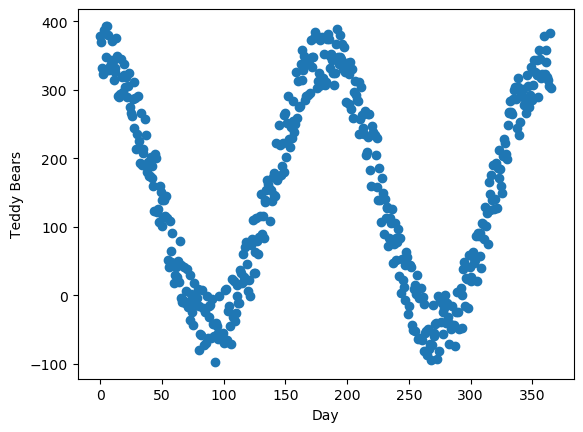

In [10]:
# Create a random synthentic dataset
# In this case, imagine you are running a business that sells teddy bears
# Here we will create a ficticious first year of sales data showing
# the amount of teddy bears you sold each day
import math, random
import matplotlib.pyplot as plt
day = torch.linspace(0, 365, 500)
teddyBears = 100*(2*torch.cos(day*4*math.pi/365)+torch.rand(500))+100

# Display our Teddy Bear sales data for year 1
plt.scatter(day, teddyBears)
plt.xlabel("Day")
plt.ylabel("Teddy Bears")
plt.show()  

In [11]:
teddyBears.size()
y=torch.unsqueeze(teddyBears,dim=1)

print (y.size())
x=torch.unsqueeze(day, dim=1)
print (x.size())
y

torch.Size([500, 1])
torch.Size([500, 1])


tensor([[ 3.7794393921e+02],
        [ 3.6963635254e+02],
        [ 3.3219824219e+02],
        [ 3.2348461914e+02],
        [ 3.8722756958e+02],
        [ 3.2794192505e+02],
        [ 3.9226855469e+02],
        [ 3.4706817627e+02],
        [ 3.9306829834e+02],
        [ 3.7970910645e+02],
        [ 3.2925787354e+02],
        [ 3.3401422119e+02],
        [ 3.4294696045e+02],
        [ 3.7117883301e+02],
        [ 3.4147097778e+02],
        [ 3.1416854858e+02],
        [ 3.3196673584e+02],
        [ 3.2633050537e+02],
        [ 3.7530062866e+02],
        [ 3.4947561646e+02],
        [ 2.9093493652e+02],
        [ 2.8873822021e+02],
        [ 2.9344375610e+02],
        [ 3.4536859131e+02],
        [ 3.1851892090e+02],
        [ 2.9681021118e+02],
        [ 3.2090032959e+02],
        [ 3.3770129395e+02],
        [ 3.0401620483e+02],
        [ 3.1871832275e+02],
        [ 2.8930651855e+02],
        [ 3.0489733887e+02],
        [ 3.2401962280e+02],
        [ 2.7525903320e+02],
        [ 2.65

In [12]:
# Train the network on the teddy bear data
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

for idx in range(100):
    pred = net(x)
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (idx % 10 == 0):
        print (f"loss: {loss}")


loss: 37560.4375
loss: 8.11430675254503e+18
loss: 5.41717614230818e+18
loss: 3.616549380208722e+18
loss: 2.4144376495205253e+18
loss: 1.6118982025318236e+18
loss: 1.0761160819212288e+18
loss: 7.184234402094776e+17
loss: 4.796251139777495e+17
loss: 3.202015973070602e+17


In [13]:
# Display our Teddy Bear sales data for year 1
predictedTeddyBears=[]
net.eval()

for day in range(1,100):
    x = torch.tensor([day],dtype=torch.float)
    x = x.unsqueeze(dim=0)
    print (x)

    numBears = net(x)
    print (numBears)
    predictedTeddyBears.append(numBears.item())

#plt.scatter(day, predictedTeddyBears)
#plt.xlabel("Day")
#plt.ylabel("Teddy Bears")
#plt.show()
print (predictedTeddyBears)

tensor([[1.]])
tensor([[-4.6235161600e+08]], grad_fn=<AddmmBackward>)
tensor([[2.]])
tensor([[-4.6235161600e+08]], grad_fn=<AddmmBackward>)
tensor([[3.]])
tensor([[-4.6235161600e+08]], grad_fn=<AddmmBackward>)
tensor([[4.]])
tensor([[-4.6235161600e+08]], grad_fn=<AddmmBackward>)
tensor([[5.]])
tensor([[-4.6235161600e+08]], grad_fn=<AddmmBackward>)
tensor([[6.]])
tensor([[-4.6235161600e+08]], grad_fn=<AddmmBackward>)
tensor([[7.]])
tensor([[-4.6235161600e+08]], grad_fn=<AddmmBackward>)
tensor([[8.]])
tensor([[-4.6235161600e+08]], grad_fn=<AddmmBackward>)
tensor([[9.]])
tensor([[-4.6235161600e+08]], grad_fn=<AddmmBackward>)
tensor([[10.]])
tensor([[-4.6235161600e+08]], grad_fn=<AddmmBackward>)
tensor([[11.]])
tensor([[-4.6235161600e+08]], grad_fn=<AddmmBackward>)
tensor([[12.]])
tensor([[-4.6235161600e+08]], grad_fn=<AddmmBackward>)
tensor([[13.]])
tensor([[-4.6235161600e+08]], grad_fn=<AddmmBackward>)
tensor([[14.]])
tensor([[-4.6235161600e+08]], grad_fn=<AddmmBackward>)
tensor([[15.]])

## Key Takeaways
- 
## Next Steps
- 